In [1]:
my_API_Key=''
my_API_Secret=''

In [2]:
############################################################
# My API and Secret Key are typed above to save my privacy!

In [3]:
# Importing 'binance' to access the price data
from binance import Client
# Importing pandas to manage the data
import pandas as pd
# Importing datetime to manage the date and time of the prices
import datetime
# Importing pyplot to plot the prices 
from matplotlib import pyplot as plt
# Importing ta library
import ta
import pandas_ta as pta

In [4]:
# Creating a function to retrieve the price data from binance
def give(shareName,timeframe,limit):
    symbol=shareName+'USDT' #for example, 'BTCUSDT'
    API_Key=my_API_Key #Typed above
    API_Secret=my_API_Secret #Typed above
    client = Client(API_Key, API_Secret)
    klines = client.get_historical_klines(symbol=symbol, interval=timeframe, limit=limit)
    return klines

In [5]:
# Creating a function to handle the retrieved data as a dataframe
def create_excel(shareName,timeframe,limit):  
    data=give(shareName,timeframe,limit)
    df=pd.DataFrame(data,columns=['Open Time','Open','High','Low','Close','Volume',
                                    'Close Time','Quote asset volume','Number of trades','Taker buy base asset volume',
                                    'Taker buy quote asset volume','Ignore'])
    df['Datetime'] = pd.to_datetime(df['Open Time'], unit='ms')
    df.index=df['Datetime']
    columns_to_convert = ['Open','High','Low','Close','Volume']
    df[columns_to_convert] = df[columns_to_convert].astype(float)
    excelName=shareName+timeframe+'.xlsx' # for example: 'BTC1h.xlsx'
    df.to_excel(excelName)
    return df

In [6]:
print(help(pta.sma))

Help on function sma in module pandas_ta.overlap.sma:

sma(close, length=None, talib=None, offset=None, **kwargs)
    Simple Moving Average (SMA)
    
    The Simple Moving Average is the classic moving average that is the equally
    weighted average over n periods.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/simple-moving-average-sma/
    
    Calculation:
        Default Inputs:
            length=10
        SMA = SUM(close, length) / length
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 10
        talib (bool): If TA Lib is installed and talib is True, Returns the TA Lib
            version. Default: True
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        adjust (bool): Default: True
        presma (bool, optional): If True, uses SMA for initial value.
        fillna (value, optional): pd.DataFrame.fillna(value)
     

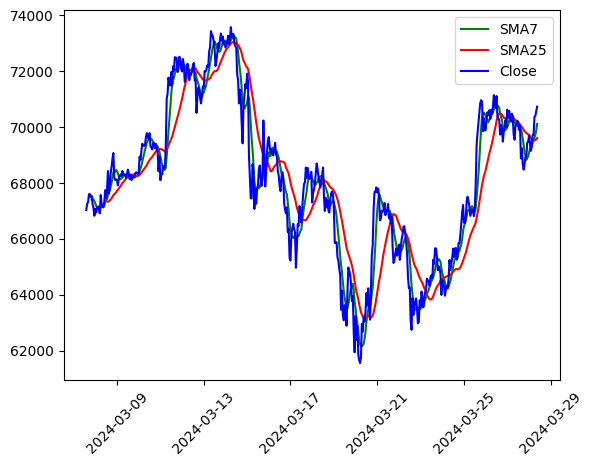

In [7]:
prices=create_excel('BTC','1h',500)
sma7=pta.sma(prices['Close'],7)
sma25=pta.sma(prices['Close'],25)
plt.plot(sma7,'g',label='SMA7')
plt.plot(sma25,'r',label='SMA25')
plt.plot(prices['Close'],'b',label='Close')
plt.legend()
plt.xticks(rotation=45)
plt.show()